In [33]:
import os
import json
import glob
import shutil
import cv2
from math import dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
degrees = ['15cm_0mm_0deg', '15cm_25mm_5deg', '15cm_50mm_10deg', '20cm_0mm_0deg', '20cm_25mm_5deg', '20cm_50mm_10deg']

In [4]:
result="../7_result"
figure = "../7_figure"

In [4]:
for ear_type in ear_types:
    names = os.listdir(os.path.join(result, ear_type))
    total = []
    for name in names:
        for deg in degrees:
            error_file = glob.glob(os.path.join(result, name, "error",deg,"*.csv"))[0]
            error_df = pd.read_csv(error_file, index_col = 0)

            interval = len(error_df) / 3
            temp = list(range(len(error_df)))
            index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]
            for i in index:
                total.append(error_df.iloc[i,:].to_numpy())



    total = np.array(total)
    total = total.reshape(-1)
    print(total.shape)      

    sorted_data_0 = np.sort(total*10)
    cumulative_prob_0 = np.arange(1, len(total) + 1) / len(total)
    plt.plot(sorted_data_0, cumulative_prob_0, label="The result of estimation without occlusion")
    plt.plot(sorted_data, cumulative_prob, label="The result of estimation with occlusion")
    plt.xlim(0, 10)
    plt.ylim(0, 1.1)
    plt.xlabel("mm")
    plt.ylabel("Probability")
    plt.title("CDF Comparison of Acupoint Estimation Error with Occlsuion")
    plt.legend()
    plt.show()
    



        
                
        
        

(4032,)


(4032,)


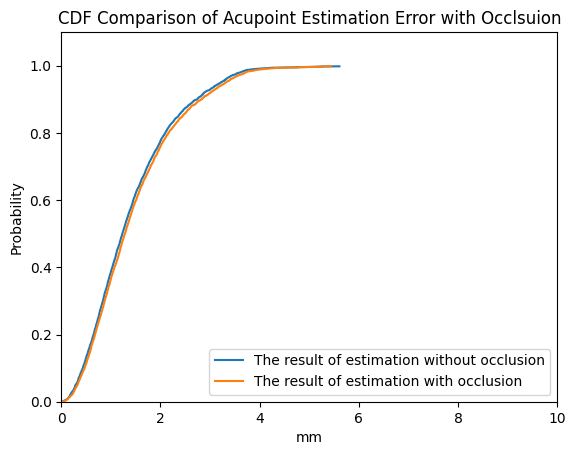

In [8]:
total = []
for name in names:
    for deg in degrees:
        error_file = glob.glob(os.path.join(occlusion_error, name,deg,"*.csv"))[0]
        error_df = pd.read_csv(error_file, index_col = 0)
        
        total.append(error_df.to_numpy())

total = np.array(total)
total = total.reshape(-1)
print(total.shape)      
    
sorted_data = np.sort(total*10)
cumulative_prob = np.arange(1, len(total) + 1) / len(total)
    
plt.plot(sorted_data_0, cumulative_prob_0, label="The result of estimation without occlusion")
plt.plot(sorted_data, cumulative_prob, label="The result of estimation with occlusion")
plt.xlim(0, 10)
plt.ylim(0, 1.1)
plt.xlabel("mm")
plt.ylabel("Probability")
plt.title("CDF Comparison of Acupoint Estimation Error with Occlsuion")
plt.legend()
plt.show()


In [5]:
without_bbox_result = "../mmpose/k_fold/result"
result="../keypoint"
ear_types=["free","attached"]

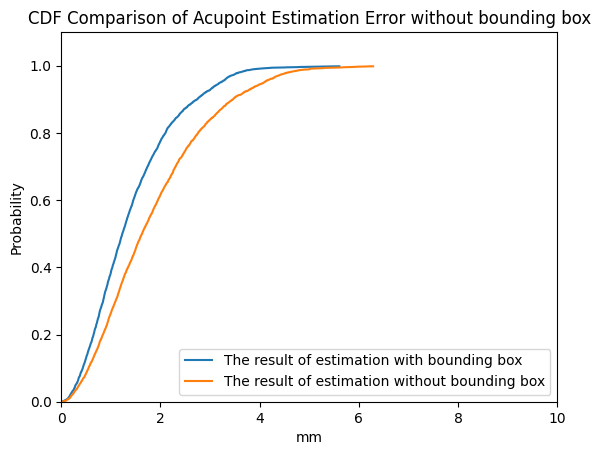

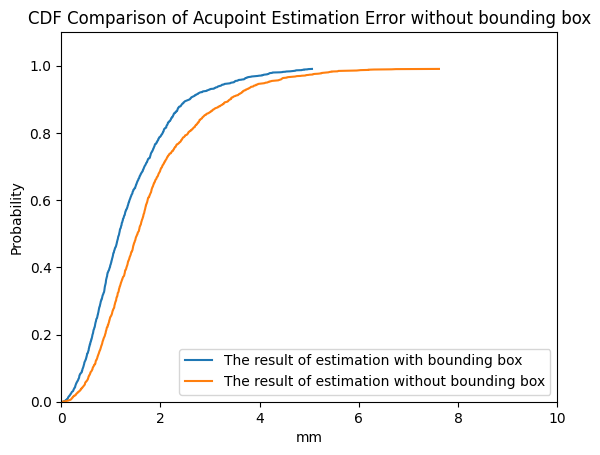

In [17]:
for ear_type in ear_types:
    without_bbox_total = []
    total = []
    names = os.listdir(os.path.join(without_bbox_result, ear_type))
    for name in names:
        for deg in degrees:
            error_file = glob.glob(os.path.join("../keypoint", ear_type, "7_result", name, "error", deg, "*.csv"))[0]
            without_bbox_error_file = glob.glob(os.path.join(without_bbox_result, ear_type, name, "error", deg, "*.csv"))[0]
            error_df = pd.read_csv(error_file, index_col = 0)
            without_bbox_error_df = pd.read_csv(without_bbox_error_file, index_col = 0)
            

            interval = len(error_df) / 3
            temp = list(range(len(error_df)))
            index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]
            for i in index:
                total.append(error_df.iloc[i,:].to_numpy())
                without_bbox_total.append(without_bbox_error_df.iloc[i,:].to_numpy())

    total = np.array(total)
    without_bbox_total = np.array(without_bbox_total)
    total = total.reshape(-1)
    without_bbox_total = without_bbox_total.reshape(-1)
    

    sorted_total = np.sort(total*10)
    sorted_without_bbox_total = np.sort(without_bbox_total*10)
    cumulative_prob_total = np.arange(1, len(total) + 1) / len(total)
    cumulative_prob_without_bbox_total = np.arange(1, len(without_bbox_total) + 1) / len(without_bbox_total)
    
    
    plt.plot(sorted_total, cumulative_prob_total, label="The result of estimation with bounding box")
    plt.plot(sorted_without_bbox_total, cumulative_prob_without_bbox_total, label="The result of estimation without bounding box")
    plt.xlim(0, 10)
    plt.ylim(0, 1.1)
    plt.xlabel("mm")
    plt.ylabel("Probability")
    plt.title("CDF Comparison of Acupoint Estimation Error without bounding box")
    plt.legend()
    if not os.path.isdir(os.path.join("../mmpose/k_fold", "CDF", ear_type)):
            os.makedirs(os.path.join("../mmpose/k_fold", "CDF", ear_type))
    plt.savefig(os.path.join("../mmpose/k_fold", "CDF", ear_type, 'CDF.png').format(index = 0))
    plt.show()
    


[-0.00616418 -0.02748367  0.00544851 ...  0.02593454  0.03664743
  0.04378663]


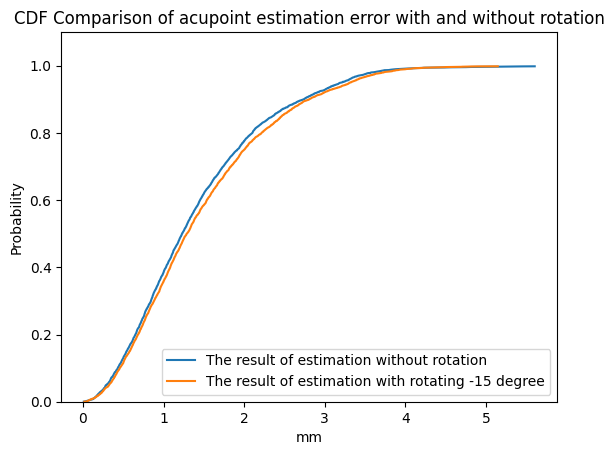

[ 0.05404829  0.0037538  -0.00452212 ... -0.09499235  0.01217164
 -0.0128195 ]


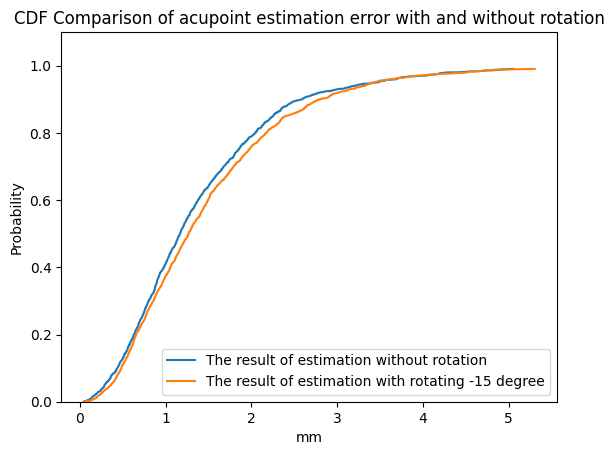

[ 0.06011233 -0.00723662  0.02259158 ...  0.00907552  0.01564558
  0.02270999]


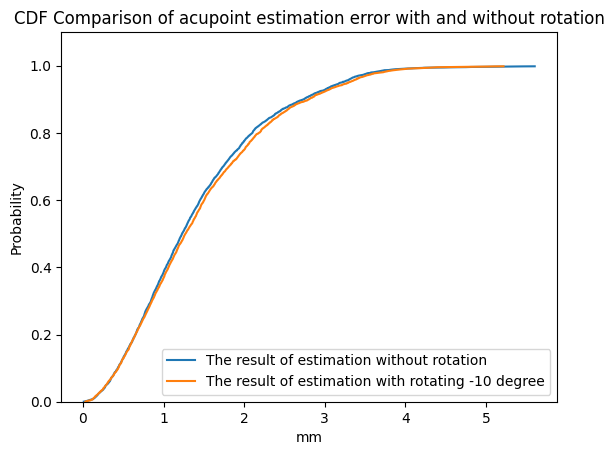

[ 0.03230675  0.00627484 -0.00772797 ... -0.06598228  0.01253772
 -0.06464971]


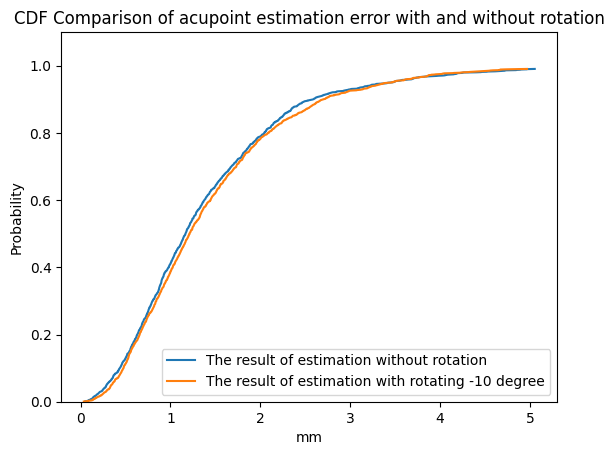

[ 0.02157999 -0.02722382  0.01356035 ... -0.01927317  0.00085152
  0.02105157]


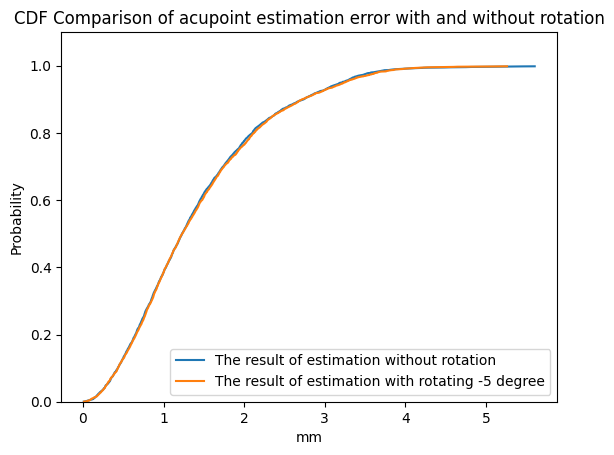

[ 0.0232066   0.00701585 -0.00437277 ... -0.02647092  0.01112025
 -0.03155484]


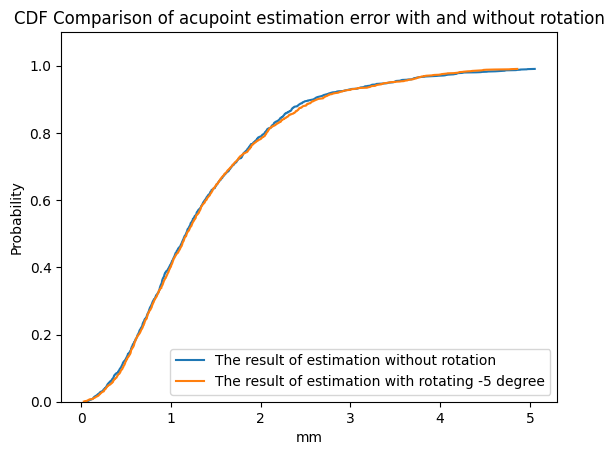

[ 0.00686737 -0.01634357 -0.01026319 ... -0.00731896  0.00522309
  0.01065616]


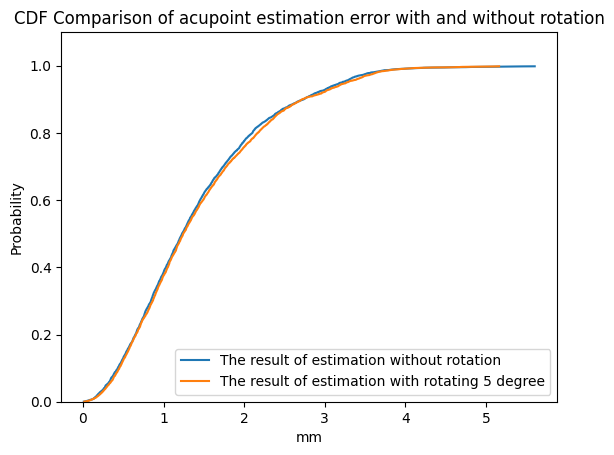

[ 0.05346422  0.01944495  0.00689135 ...  0.01692832  0.02577654
 -0.01193781]


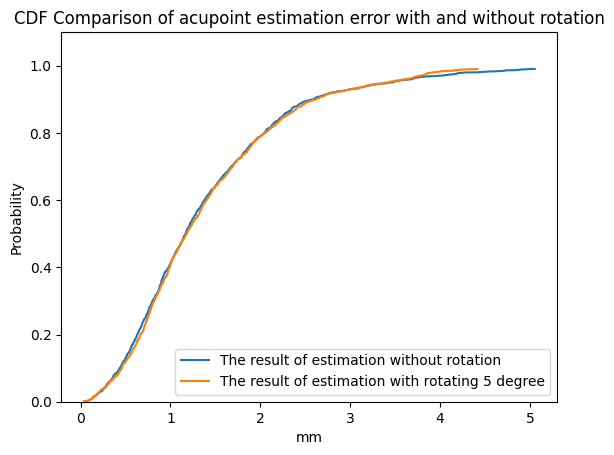

[ 0.06189936 -0.01956935 -0.02918294 ... -0.01112446  0.00149504
  0.04186658]


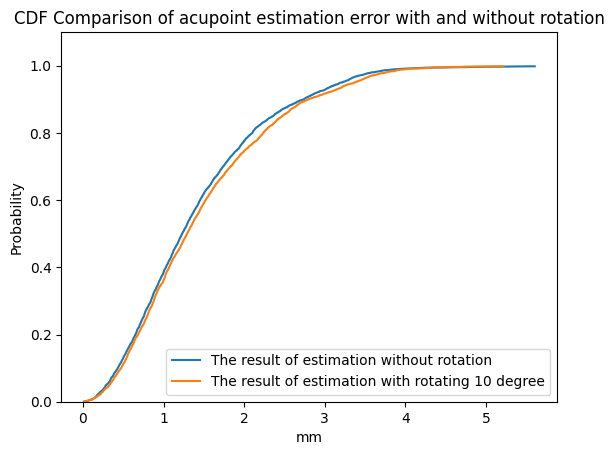

[ 0.08030599  0.04489336  0.03084435 ... -0.01863016  0.01609461
 -0.01723365]


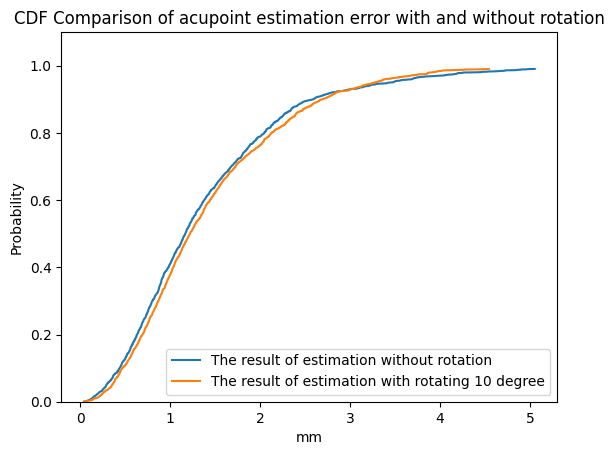

[ 0.02767783 -0.0372864  -0.03520295 ...  0.01202126  0.00536806
  0.01720245]


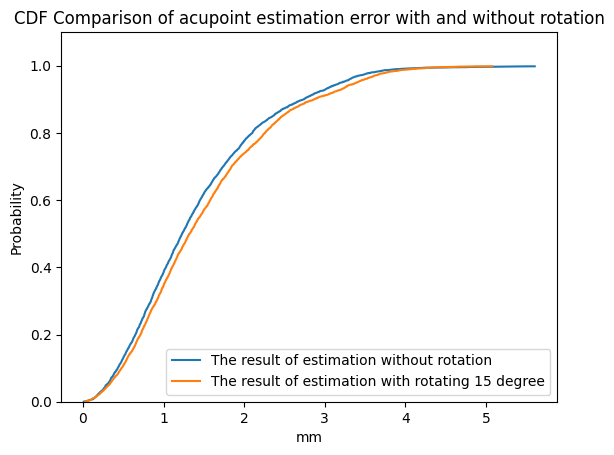

[ 0.0681377   0.02253744  0.02217231 ... -0.03891981  0.03548938
 -0.02200366]


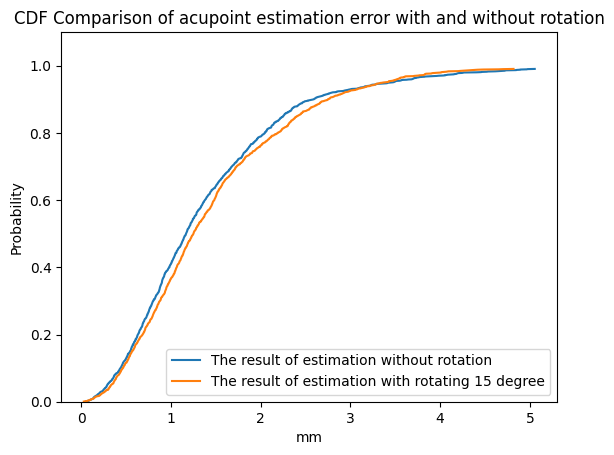

In [27]:
data_aug = "../data_aug"
angles = [-15, -10, -5,5,10, 15]
for angle in angles:
    for ear_type in ear_types:
        rotate_total = []
        total = []
        names = os.listdir(os.path.join(data_aug, ear_type, str(angle)))
        for name in names:
            for deg in degrees:
                error_file = glob.glob(os.path.join("../keypoint", ear_type, "7_result", name, "error", deg, "*.csv"))[0]
                rotate_error_file = os.path.join(data_aug, ear_type, str(angle), name, deg, "error.csv")
                error_df = pd.read_csv(error_file, index_col = 0)
                rotate_error_df = pd.read_csv( rotate_error_file, index_col = 0)


                interval = len(error_df) / 3
                temp = list(range(len(error_df)))
                index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]
                for i in index:
                    total.append(error_df.iloc[i,:].to_numpy())
                    rotate_total.append(rotate_error_df.loc[i,:].to_numpy())

        total = np.array(total)

        rotate_total = np.array(rotate_total)

        total = total.reshape(-1)
        
        rotate_total = rotate_total.reshape(-1)
        print(total-rotate_total)

        sorted_total = np.sort(total*10)
        sorted_rotate_total = np.sort(rotate_total*10)
        cumulative_prob_total = np.arange(1, len(total) + 1) / len(total)
        cumulative_prob_rotate_total = np.arange(1, len(rotate_total) + 1) / len(rotate_total)


        plt.plot(sorted_total, cumulative_prob_total, label="The result of estimation without rotation")

        plt.plot(sorted_rotate_total, cumulative_prob_rotate_total, label="The result of estimation with rotating {angle} degree".format(angle = angle))
        
        plt.ylim(0, 1.1)
        plt.xlabel("mm")
        plt.ylabel("Probability")
        plt.title("CDF Comparison of acupoint estimation error with and without rotation")
        plt.legend()
        
        if not os.path.exists(os.path.join(data_aug, "fig", str(angle))):
            os.makedirs(os.path.join(data_aug, "fig", str(angle)))
        plt.savefig(os.path.join(data_aug, "fig", str(angle), 'CDF_{ear_type}.png').format(ear_type = ear_type))
        plt.show()
    

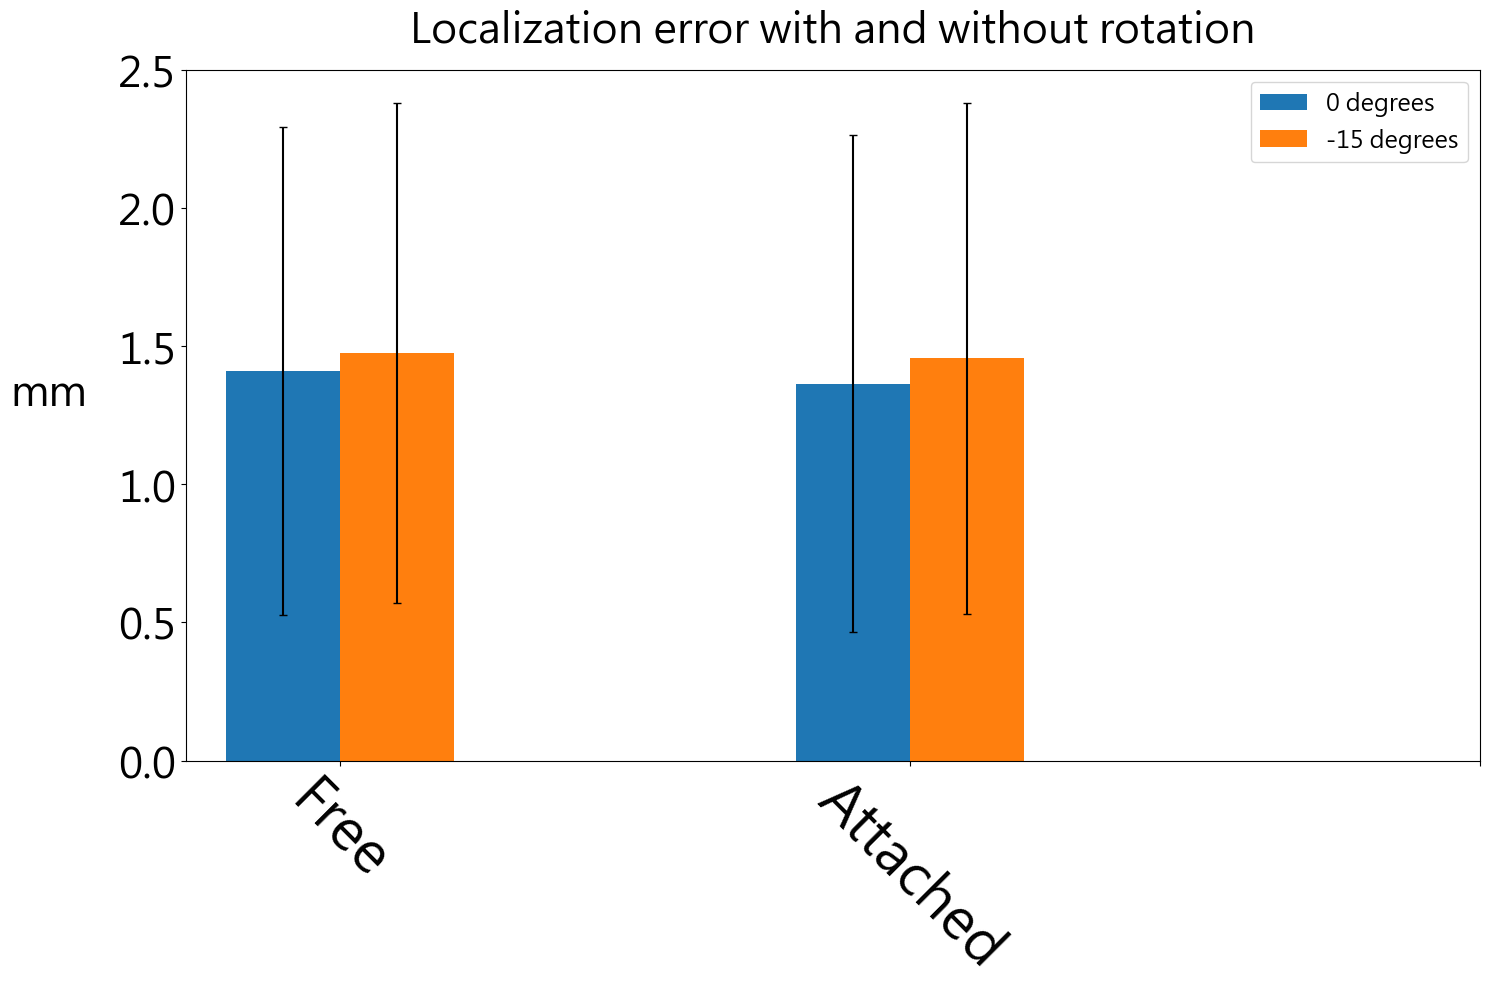

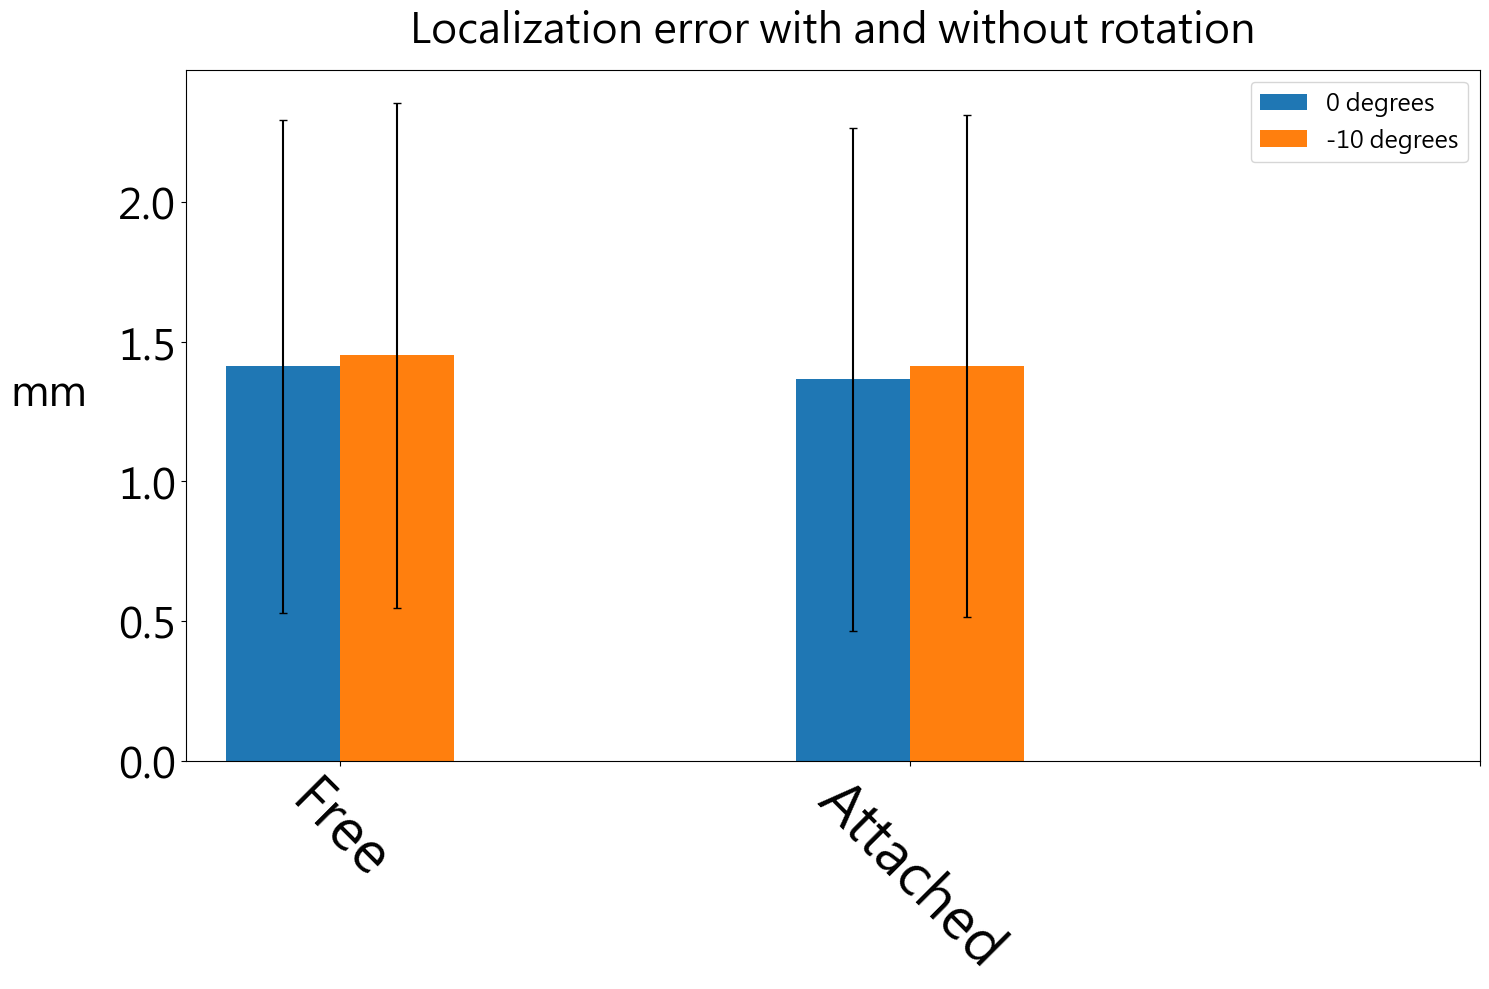

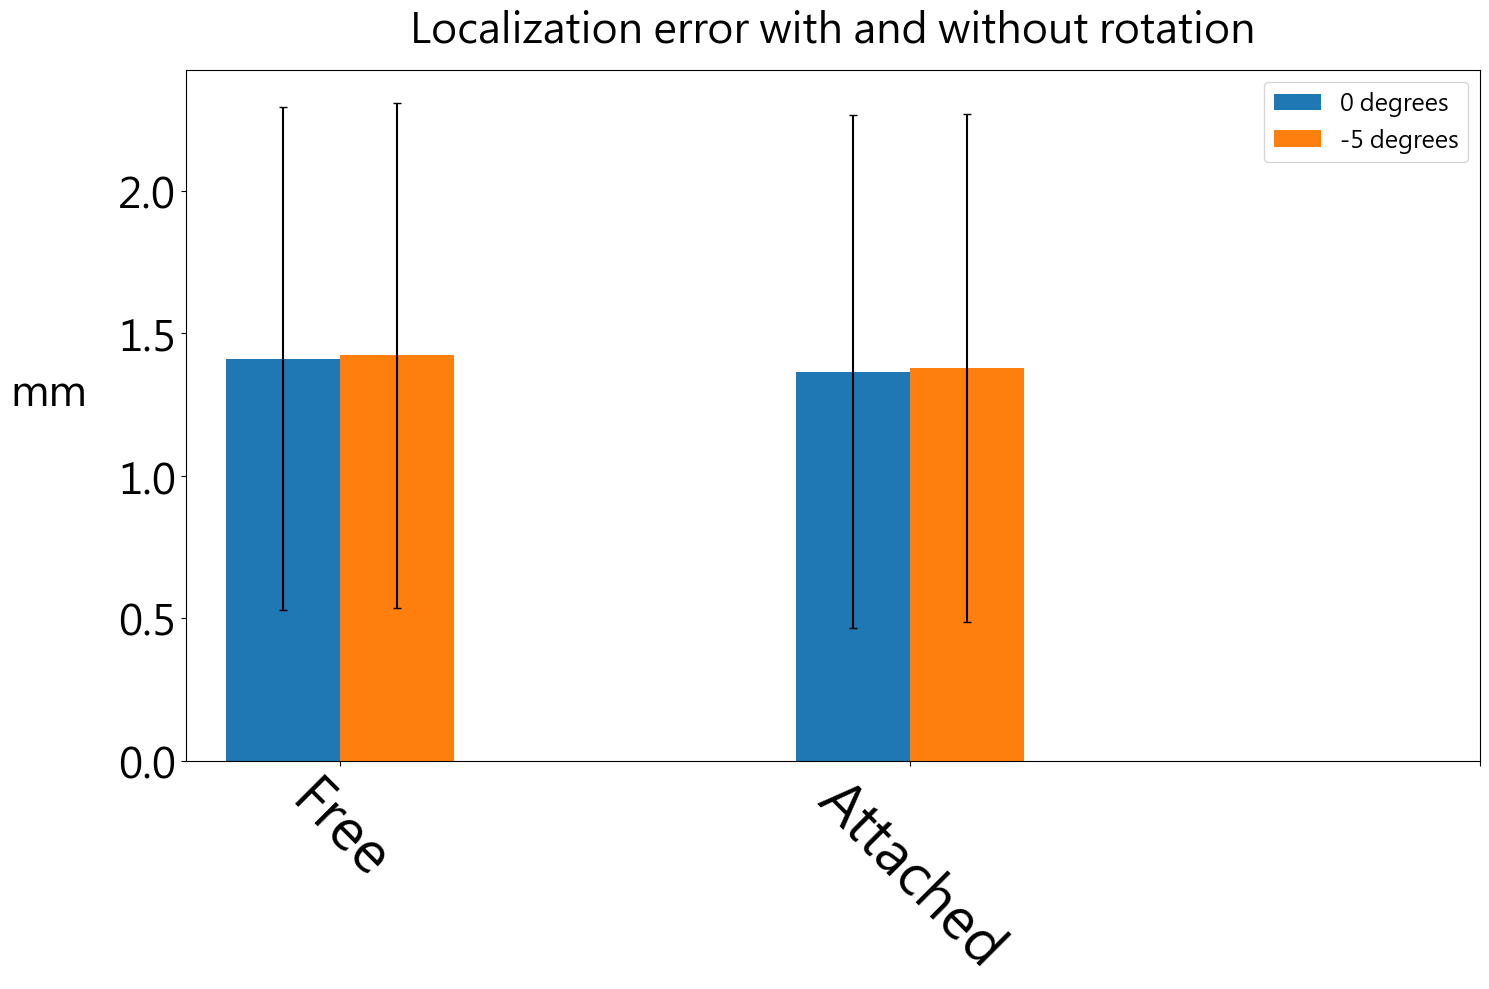

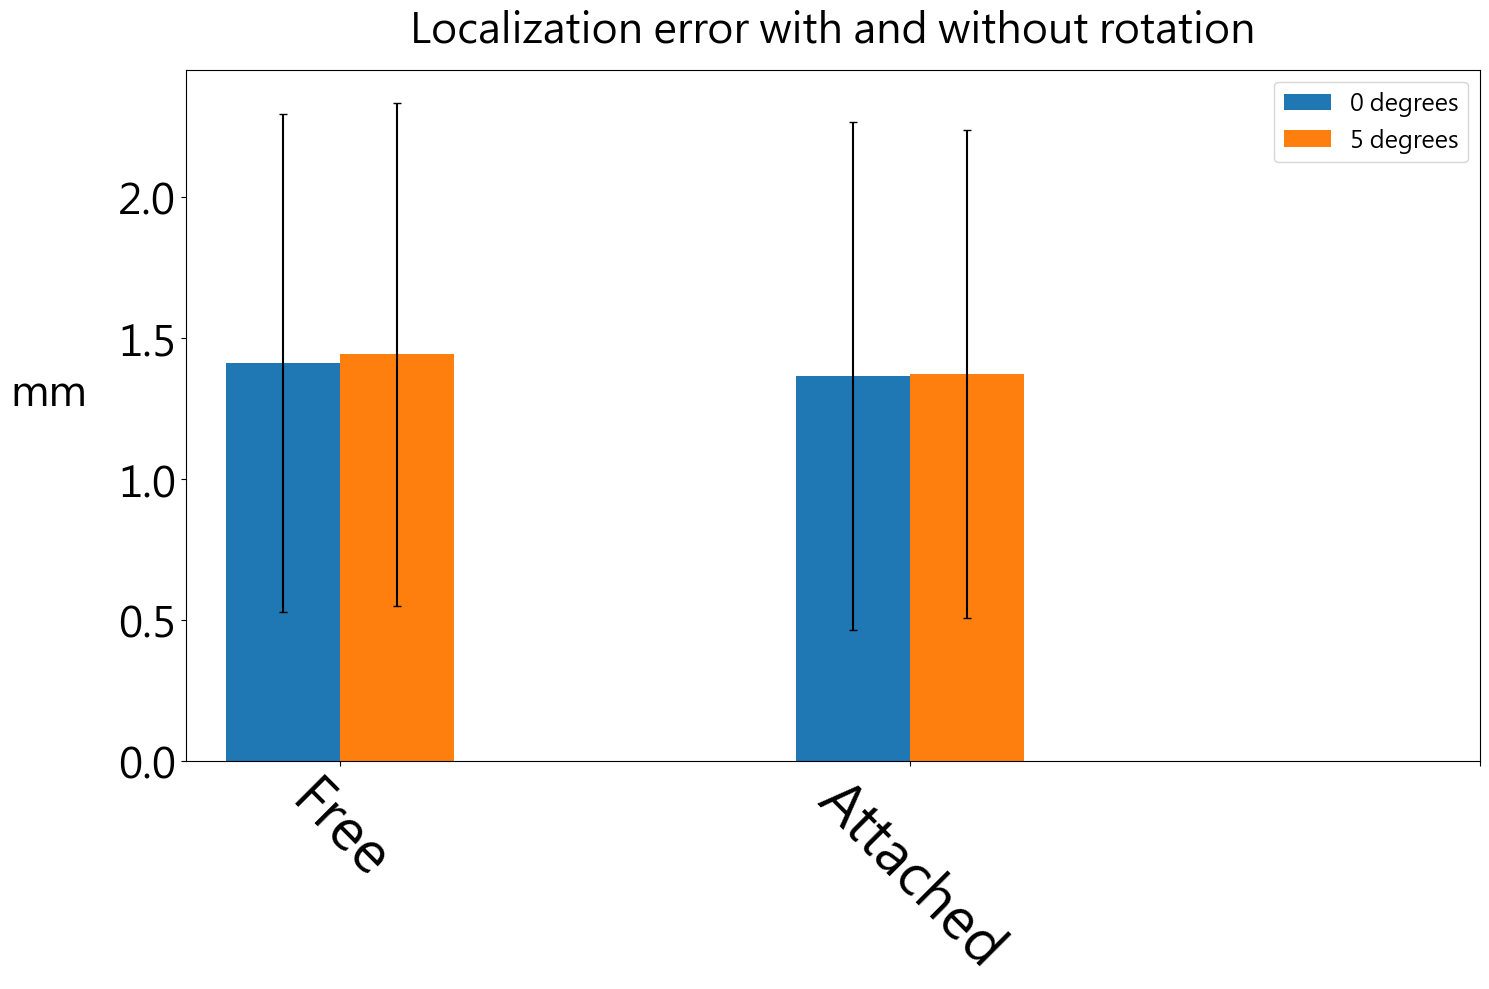

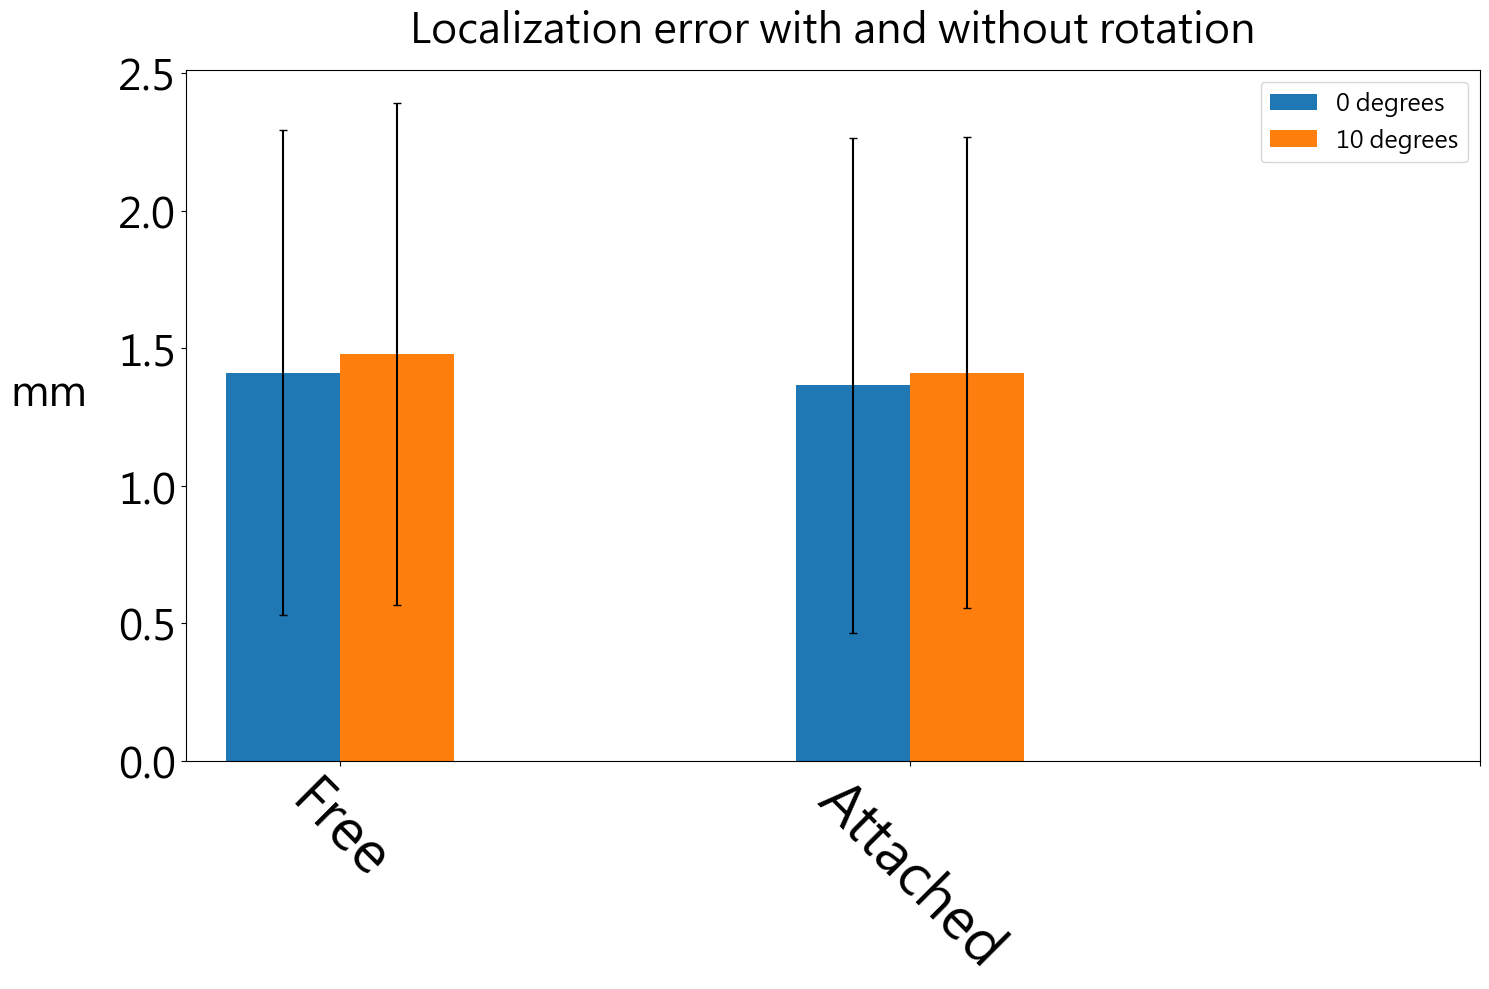

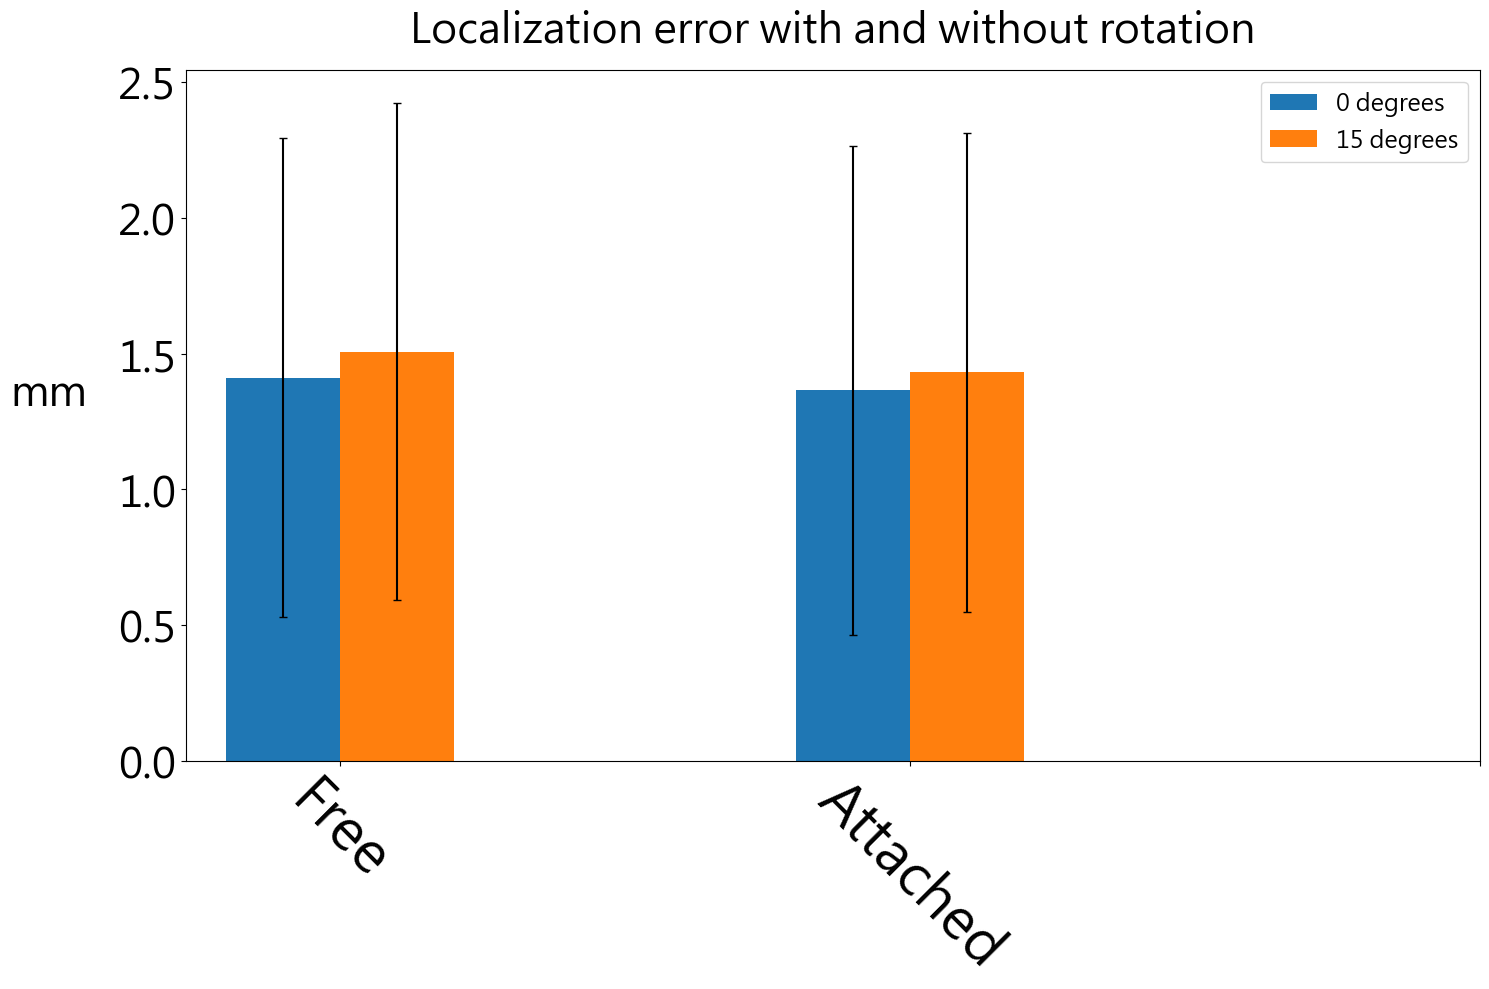

In [31]:
data_aug = "../data_aug"
angles = [-15, -10, -5,5,10, 15]

for angle in angles:
    final_mean = [[],[]]
    final_std = [[],[]]
    for ear_type in ear_types:
        rotate_total = []
        total = []
        names = os.listdir(os.path.join(data_aug, ear_type, str(angle)))
        for name in names:
            for deg in degrees:
                error_file = glob.glob(os.path.join("../keypoint", ear_type, "7_result", name, "error", deg, "*.csv"))[0]
                rotate_error_file = os.path.join(data_aug, ear_type, str(angle), name, deg, "error.csv")
                error_df = pd.read_csv(error_file, index_col = 0)
                rotate_error_df = pd.read_csv( rotate_error_file, index_col = 0)


                interval = len(error_df) / 3
                temp = list(range(len(error_df)))
                index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]
                for i in index:
                    total.append(error_df.iloc[i,:].to_numpy())
                    rotate_total.append(rotate_error_df.loc[i,:].to_numpy())

        total = np.array(total)

        rotate_total = np.array(rotate_total)

        total = total.reshape(-1)
        
        rotate_total = rotate_total.reshape(-1)
        final_mean[0].append(np.nanmean(total, axis=0)*10)
        final_mean[1].append(np.nanmean(rotate_total, axis=0)*10)
        
        final_std[0].append(np.nanstd(total, axis=0)*10)
        final_std[1].append(np.nanstd(rotate_total, axis=0)*10)
    plt.figure(figsize=(15,10))

    for l in range(0 ,len(final_mean)):
        if l == 0:
            plt.bar(np.arange(len(final_mean)) + l*0.2, final_mean[l], yerr=final_std[l], align='center', label = '{index} degrees'.format(index = 0), ecolor='black', capsize=3, width=0.2)
        
        else:
            plt.bar(np.arange(len(final_mean)) + l*0.2, final_mean[l], yerr=final_std[l], align='center', label = '{index} degrees'.format(index = angle), ecolor='black', capsize=3, width=0.2)


    plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

    font_path = r'C:\Windows\Fonts\msjhl.ttc'
#     font = FontProperties(fname=font_path, size=12)
    plt.xticks(np.arange(3) + 0.1, ["Free","Attached",""], fontsize=40, rotation=-45, ha='center')


    plt.yticks(fontsize=30)
    plt.title('Localization error with and without rotation', fontsize = 30, pad = 20)

    plt.legend(loc=1,fontsize=17)

    plt.tight_layout()

    if not os.path.isdir(os.path.join(data_aug, "fig", str(angle))):
        os.makedirs(os.path.join(data_aug, "fig", str(angle)))

    plt.savefig(os.path.join(data_aug, "fig", str(angle),'rotate_pred_error.png').format(index = 0))
    plt.show() 

In [ ]:
 angles_mean.append(np.nanmean(sum_eight_people, axis=0)*10)
            angles_std.append(np.nanstd(sum_eight_people, axis=0)*10)
        plt.figure(figsize=(15,10))

        for l in range(0 ,len(angles_mean)):

            plt.bar(np.arange(acupoints_num) + l*0.2, angles_mean[l], yerr=angles_std[l], align='center', label = '{index} degrees'.format(index = 0 + 10*l), ecolor='black', capsize=3, width=0.2)


        plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

        font_path = r'C:\Windows\Fonts\msjhl.ttc'
        font = FontProperties(fname=font_path, size=12)
        plt.xticks(np.arange(acupoints_num) + 0.3, acupoints_name[:acupoints_num], fontsize=12, rotation=-45, ha='center')


        plt.yticks(fontsize=30)
        plt.title('Localization error of different acupoints', fontsize = 30, pad = 20)

        plt.legend(fontsize=17)

        plt.tight_layout()

        if not os.path.isdir(os.path.join(figure, ear_type, deg)):
            os.makedirs(os.path.join(figure, ear_type, deg))

        plt.savefig(os.path.join(figure, ear_type, deg,'different acupoints.png').format(index = 0))
        plt.show() 

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

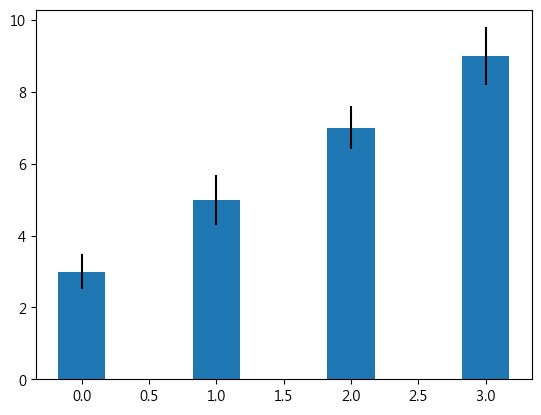

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 四组数据的均值和标准差
means = [3, 5, 7, 9]
stds = [0.5, 0.7, 0.6, 0.8]

# 设置组数
n_groups = 4

# 设置两组之间的距离
distance_between_groups = 1.5

# 设置条形宽度
bar_width = 0.35

# 创建 x 坐标数组
index = np.arange(n_groups)

# 绘制条形图
plt.bar(index, means, bar_width, yerr=stds, label='Group 1')

# 调整 x 坐标位置
index += distance_between_groups

# 绘制另一组条形图
plt.bar(index, means, bar_width, yerr=stds, label='Group 2')

# 添加 x 轴刻度标签
plt.xticks(index - bar_width / 2, ('A', 'B', 'C', 'D'))

# 添加图例
plt.legend()

# 显示图形
plt.show()